In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os

In [2]:
kdata = np.load('KeplerSampleFullQ.npy',encoding='bytes')
print(kdata.shape)
print(len(kdata[250][0]))

(2500, 3)
3534


In [3]:
import os
dmints = [-1.2,-0.3,-0.1,-0.05, -0.02,-0.01, -0.006, -0.005, -0.004, -0.0012, 
          -0.001, -0.0006, -0.0003, 0,  0.0003, 0.0006, 0.001, 0.0012, 0.003, 
          0.004, 0.005, 0.006, 0.01, 0.02, 0.05, 0.1, 0.3, 0.6, 1.2]
dtints = [-1.0/145, 1.0/47, 2.0/47, 3.0/47, 4.0/47, 6.0/47, 10.0/47, 15.0/47,
          20.0/47, 30.0/47, 40.0/47,   1.0,   1.2,  
           1.4,  1.5, 1.7,  2, 2.25,  2.5, 3.0, 4, 6 , 9, 15, 20, 30, 45, 60, 90]

def pairwisediffs(arrayoned):
    x = arrayoned.reshape((1,len(arrayoned)))
    xdm = x[:] - np.transpose(x[:])
    xd = xdm[np.triu_indices(len(x[0]), k = 1)]
    return(xd)
def get2dhist(lightcurve):
    xd = pairwisediffs(lightcurve[0])
    yd = pairwisediffs(lightcurve[1])
    H,xe,ye = np.histogram2d(xd,yd,bins=[dtints,dmints],range=None,normed=False)
    G = 255*H/np.sum(H)
    return G

def load_data(directory):
    data = []
    for file in os.listdir(directory):
        data.append(np.load(directory+"/"+file))
    data = np.array(data)
    return data
        

In [ ]:
# def first_n_points(n, dir_name):
#     if not os.path.exists(dir_name):
#         os.makedirs(dir_name)
    
#     normalized_x_flux = []
#     normalized_y_flux = []
#     for i, _ in enumerate(kdata):
#         if len(kdata[i][1]) == 3534:
#             normalized_x_flux.append(kdata[i][0])
#             normalized_y_flux.append(kdata[i][1])

#     nx = np.array(normalized_x_flux)
#     ny = np.array(normalized_y_flux)
#     nx = nx[:, :n]
#     ny = ny[:, :n]
#     data = []
#     for i, _ in enumerate(nx):
#         fastdmdt = get2dhist([nx[i],ny[i]])
#         np.save(dir_name + "/" + str(i), fastdmdt.T)
#         data.append(fastdmdt)
                            
                              
#     return np.array(data)

# points_30 = first_n_points(3534, "full_points_final")
# print points_30.shape

In [4]:
data = load_data("full_points_final")

In [5]:
data.shape

(2196, 28, 28)

In [6]:
data[0].shape

(28, 28)

In [ ]:
import mpld3
%matplotlib inline 
mpld3.enable_notebook()

In [49]:
import umap
import sklearn
from sklearn.manifold import TSNE
tt = data.reshape(2196, 784)
x_embedded_tsne_first = TSNE(n_components=2, perplexity=20).fit_transform(tt)
x_embedded_umap_first = umap.UMAP(n_neighbors=20).fit_transform(tt)


{0: 'gray', 1: 'gray', 2: 'gray', 3: 'gray', 4: 'gray', 5: 'gray', 6: 'gray', 7: 'gray', 8: 'gray', 9: 'gray', 10: 'gray', 11: 'gray', 12: 'gray', 13: 'gray', 14: 'gray', 15: 'gray', 16: 'gray', 17: 'gray', 18: 'gray', 19: 'gray', 20: 'gray', 21: 'gray', 22: 'gray', 23: 'gray', 24: 'gray', 25: 'gray', 26: 'gray', 27: 'gray', 28: 'gray', 29: 'gray', 30: 'gray', 31: 'gray', 32: 'gray', 33: 'gray', 34: 'gray', 35: 'gray', 36: 'gray', 37: 'gray', 38: 'gray', 39: 'gray', 40: 'gray', 41: 'gray', 42: 'gray', 43: 'gray', 44: 'gray', 45: 'gray', 46: 'gray', 47: 'gray', 48: 'gray', 49: 'gray', 50: 'gray', 51: 'gray', 52: 'gray', 53: 'gray', 54: 'gray', 55: 'gray', 56: 'gray', 57: 'gray', 58: 'gray', 59: 'gray', 60: 'gray', 61: 'gray', 62: 'gray', 63: 'gray', 64: 'gray', 65: 'gray', 66: 'gray', 67: 'gray', 68: 'gray', 69: 'gray', 70: 'gray', 71: 'gray', 72: 'gray', 73: 'gray', 74: 'gray', 75: 'gray', 76: 'gray', 77: 'gray', 78: 'gray', 79: 'gray', 80: 'gray', 81: 'gray', 82: 'gray', 83: 'gray', 8

TypeError: float() argument must be a string or a number

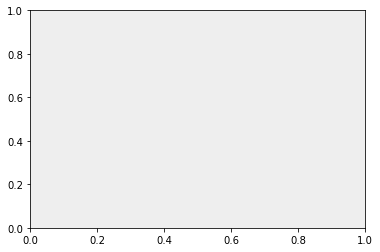

In [60]:
def plot_lc(emedded_mat, title):
    x = emedded_mat[:, 0]
    y = emedded_mat[:, 1]
    fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
    N = len(x)
#     c = np.random.random(size=N)
#     print c
    hehe = []
    for i in range(N):
        if i == 1781:
            hehe[i] = "blue"
        else:
            hehe[i] = "gray"
    print hehe
    scatter = ax.scatter(x,
                         y,
                         c=hehe,
                         s=1,
                         alpha=0.3)
    ax.grid(color='white', linestyle='solid')

    ax.set_title(title, size=15)

    labels = ['point {0}'.format(i + 1) for i in range(N)]
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
        
plot_lc(x_embedded_tsne_first, "LC 1 - TSNE")
mpld3.display()


In [51]:
plot_lc(x_embedded_umap_first, "LC 1 - UMAP")
mpld3.display()